In [3]:
# Import Keras modules and its important APIs
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
# from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os
import torch
import torch.nn as nn
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input


In [4]:
train_path="archive - Copy/Indian-monuments/images/train"

In [5]:
# splitfolders.ratio(train_path, output="archive - Copy/data-split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)


In [6]:
dicti_values={0:'Ajanta Caves',
 1:'Charar E Sharif',
 2:'Chhota Imambara',
 3:'Ellora Caves',
 4:'Fatehpur Sikri',
 5:'Gateway of India',
 6:'Humayun_s Tomb',
 7:'India gate pics',
 8:'Khajuraho',
 9:'Sun Temple Konark',
 10:'alai darwaza',
 11:'alai minar',
 12:'basilica of bom jesus',
 13:'charminar',
 14:'golden temple',
 15:'hawa mahal pics',
 16:'iron pillar',
 17:'jamali kamali_tomb',
 18:'lotus temple',
 19:'mysore palace',
 20:'qutub minar',
 21:'tajmahal',
 22:'tanjavur temple',
 23:'victoria memorial'}
l=[]
for i in range(23):
    l.append(dicti_values[i])
class_names=l
print(class_names)

['Ajanta Caves', 'Charar E Sharif', 'Chhota Imambara', 'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India', 'Humayun_s Tomb', 'India gate pics', 'Khajuraho', 'Sun Temple Konark', 'alai darwaza', 'alai minar', 'basilica of bom jesus', 'charminar', 'golden temple', 'hawa mahal pics', 'iron pillar', 'jamali kamali_tomb', 'lotus temple', 'mysore palace', 'qutub minar', 'tajmahal', 'tanjavur temple']


In [7]:
datagen = ImageDataGenerator()

In [8]:
train_generator = datagen.flow_from_directory( 
    directory="archive - Copy/data-split/train", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="binary", 
)
valid_generator = datagen.flow_from_directory( 
    directory="archive - Copy/data-split/val", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

# test data
test_generator = datagen.flow_from_directory( 
    directory="archive - Copy\data-split/test", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 2935 images belonging to 23 classes.


<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
C:\Users\91995\AppData\Local\Temp\ipykernel_4424\1830802308.py:18: SyntaxWarning: invalid escape sequence '\d'
  directory="archive - Copy\data-split/test",


Found 836 images belonging to 23 classes.
Found 433 images belonging to 23 classes.


In [9]:
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [10]:
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(24, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [11]:
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [12]:
model_history = trainModel(model = model, epochs = 160, optimizer = "Adam")

Epoch 1/160


c:\Users\91995\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 708s 7s/step - accuracy: 0.0630 - loss: 3.7445 - val_accuracy: 0.1770 - val_loss: 2.9373
Epoch 2/160
92/92 ━━━━━━━━━━━━━━━━━━━━ 672s 7s/step - accuracy: 0.1110 - loss: 2.8732 - val_accuracy: 0.3864 - val_loss: 2.5044
Epoch 3/160
92/92 ━━━━━━━━━━━━━━━━━━━━ 627s 7s/step - accuracy: 0.1903 - loss: 2.5264 - val_accuracy: 0.5156 - val_loss: 1.8478
Epoch 4/160
92/92 ━━━━━━━━━━━━━━━━━━━━ 624s 7s/step - accuracy: 0.2858 - loss: 2.1223 - val_accuracy: 0.5299 - val_loss: 1.4431
Epoch 5/160
92/92 ━━━━━━━━━━━━━━━━━━━━ 636s 7s/step - accuracy: 0.3799 - loss: 1.8207 - val_accuracy: 0.6328 - val_loss: 1.2443
Epoch 6/160
92/92 ━━━━━━━━━━━━━━━━━━━━ 636s 7s/step - accuracy: 0.4228 - loss: 1.6443 - val_accuracy: 0.6555 - val_loss: 1.0826
Epoch 7/160
92/92 ━━━━━━━━━━━━━━━━━━━━ 691s 7s/step - accuracy: 0.4706 - loss: 1.4747 - val_accuracy: 0.6663 - val_loss: 1.0061
Epoch 8/160
92/92 ━━━━━━━━━━━━━━━━━━━━ 599s 6s/step - accuracy: 0.5393 - loss: 1.3057 - val_accuracy: 0.7045 - val_l

In [13]:
model.save('resnet_model646.h5')

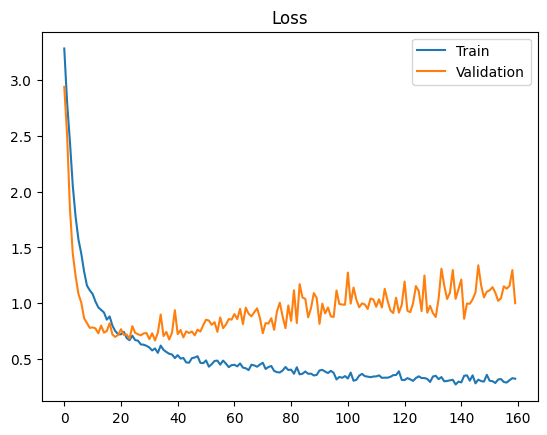

In [14]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

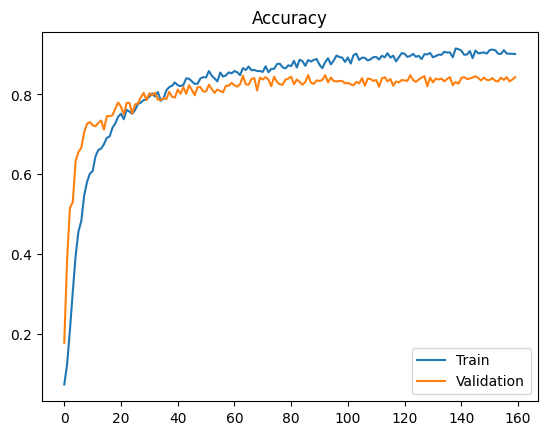

In [15]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

14/14 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.8710 - loss: 0.5871
The test loss is:  0.6006544232368469
The best accuracy is:  88.22171092033386


In [17]:
model.save('resnet_model745.h5')

In [49]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 27,257,098 (103.98 MB)

 Trainable params: 1,223,128 (4.67 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,446,258 (9.33 MB)